## Lab | Cleaning numerical data


In [2]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
# 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df = customer_df.rename(columns=str.lower)

In [6]:
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
# 5. Change effective to date column to datetime format
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'], format='mixed')

In [9]:
# 6. Create a NEW dataframe using only the numerical data called numerical_df.
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [16]:
# 7. Define a function that differentiates between continuous and discrete variables.
def diff_cont_descrete(num_df,customer_df):
        continuous_vars = []
        discrete_vars = []
        for col in num_df.columns:
            if (num_df[col].nunique()/len(customer_df) >= 0.02):
                continuous_vars.append(col)
            else:
                discrete_vars.append(col)
                
        return continuous_vars, discrete_vars
            
#             num_df.nunique()/len(customer_df)

continuous_vars, discrete_vars = diff_cont_descrete(numerical_df,customer_df)

continuous_df = numerical_df[continuous_vars]
discrete_df = numerical_df[discrete_vars]
display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


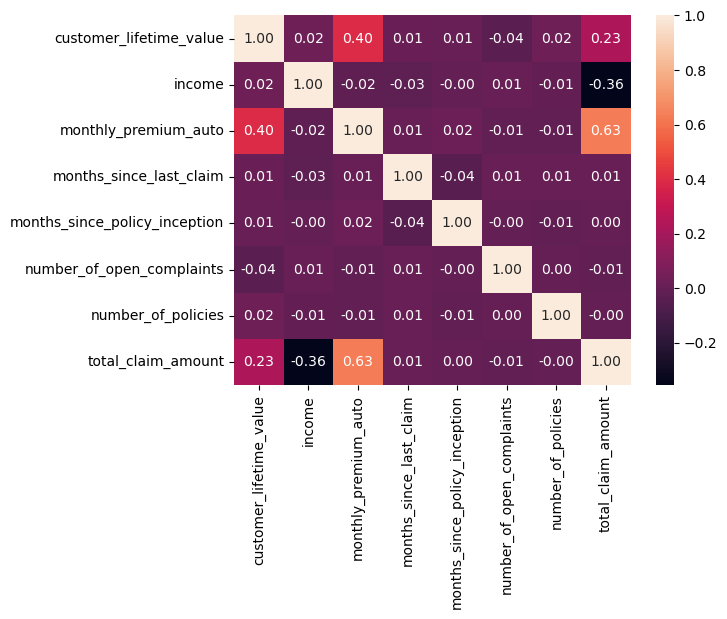

In [17]:
# 8. Plot a correlation matrix, comment what you se
# good co relation between customer life time value and total claim amount. Another 
# one monthly premium auto and customer life time value
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")  
plt.show()

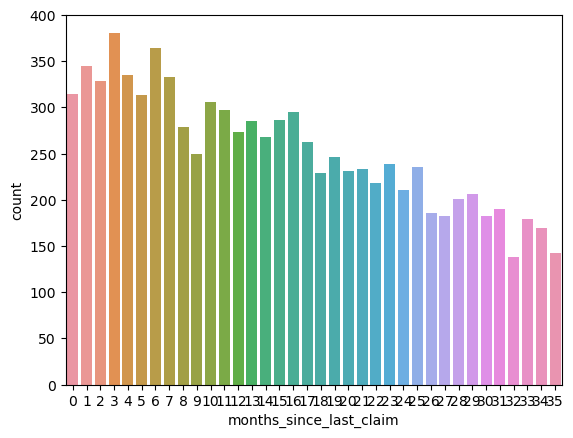

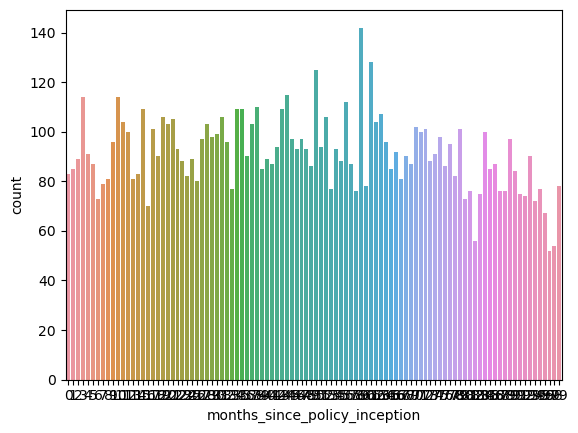

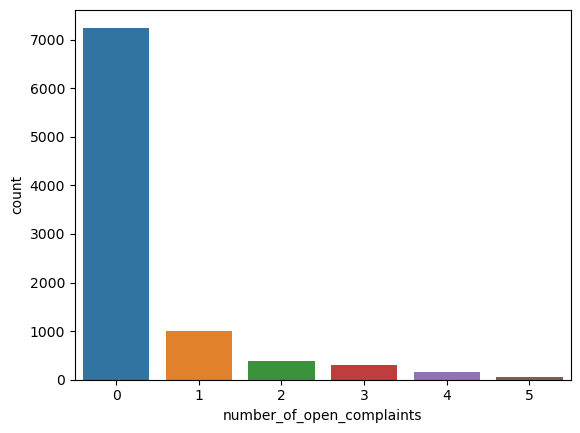

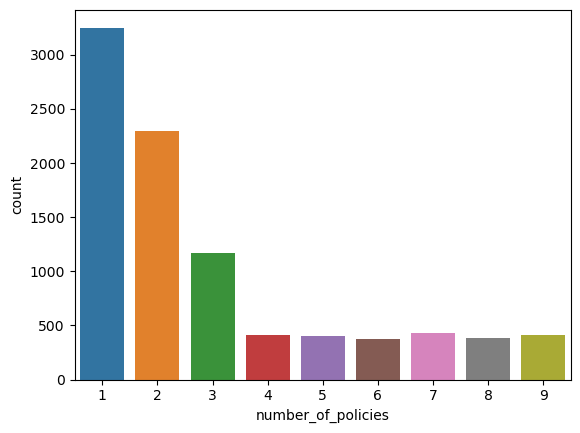

In [18]:
# 9. Create a function to plot every discrete variable
discrete_df = customer_df[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]

def plot_graph(df, dtype='descrete'):
    
    match dtype:
        case "continues":
            for col in df:
                sns.histplot(data=df, x=col, kde=True)
                plt.show()
        case "boxplot":
            for col in df:
                sns.boxplot(y=df[col])
                plt.show()
        case _:
            for col in df:
                sns.countplot(x=col, data=df)
                plt.show()
                
plot_graph(discrete_df)

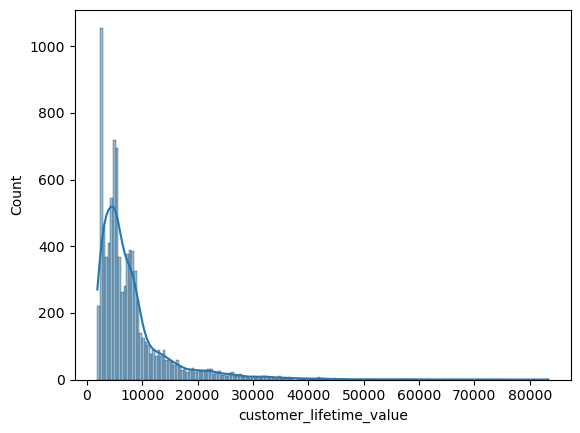

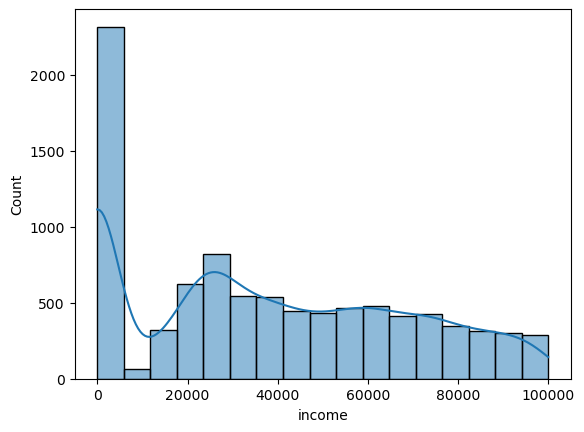

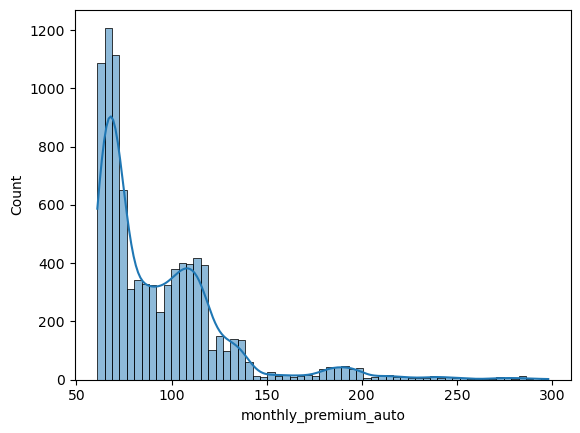

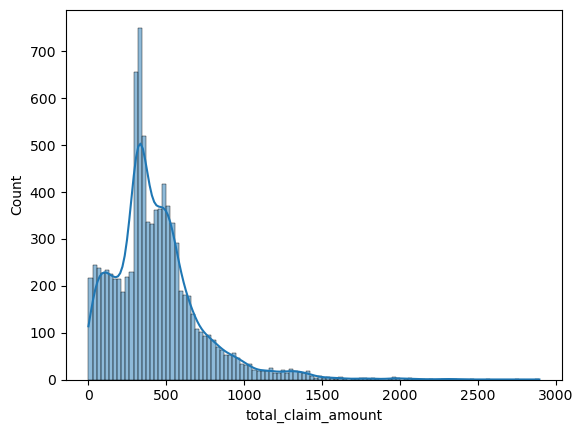

In [19]:
continues_df = numerical_df.drop(discrete_df, axis=1)
plot_graph(continues_df,'continues')

In [ ]:
# 10. Comment what you can see in the plots
# customer life time value, monthly premium value and total claim amount right sckewed

In [ ]:
# 11. Look for outliers in the continuous variables
for col in continues_df:
    iqr = np.nanpercentile(continues_df[col],75) - np.nanpercentile(continues_df[col],25)
    upper_limit = np.nanpercentile(continues_df[col],75) + 1.5*iqr
    extraordinary_points = continues_df[continues_df[col] > upper_limit]    
    print(col + ":" + str(len(extraordinary_points)))

In [ ]:
# 12. There is no outliers for the numerical columns

In [ ]:
# 13. Check all columns for NaN values
numerical_df.isnull().sum()/len(numerical_df)

In [ ]:
# 14. Save the numerical_df to csv as numerical.csv
numerical_df.to_csv('files_for_lab/numerical.csv', index=False) 

## Lab | Cleaning categorical data

In [ ]:
# 1. Open the notebook created for Lab-cleaning-numerical-data.
# 2. Find all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
display(categorical_df.shape)
display(categorical_df.head(5))

In [ ]:
# 3. Check for NaN values and decide what to do with them, do it now.
categorical_df.isnull().sum()

In [ ]:
# 4. Check all unique values of columns.
categorical_df = categorical_df.drop('customer', axis=1)

for col in categorical_df.columns:
    unique_values = categorical_df[col].unique()
    display(f"Unique values in column '{col}': {unique_values}")

In [ ]:
# 5. Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

In [ ]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.
mixed_columns = []
for col in categorical_df.columns:
    mixed_data = categorical_df[col].apply(lambda x: any(char.isalpha() for char in str(x)) and any(char.isdigit() for char in str(x)))
    if mixed_data.any():
        mixed_columns.append(col)
        
print(mixed_columns)

In [ ]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# Till now dont need to clean data unless get any issue 

In [ ]:
# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df.groupby(['policy_type','policy']).size().reset_index(name='count')

In [ ]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your 
# thoughts and make those changes.
for col in categorical_df.columns:
    num_unique_values = categorical_df[col].nunique()
    print(f"Number of unique values in column '{col}': {num_unique_values}")

In [ ]:
# 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv("files_for_lab/categorical.csv", index=False)